In [1]:
import yfinance as yf

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [137]:
msft = yf.Ticker("MSFT")

In [138]:
dataset = msft.history(period="5y")

In [139]:
dataset

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-09-08,39.35,39.99,39.26,39.89,32469800,0.0,0
2015-09-09,40.18,40.35,39.00,39.14,33469500,0.0,0
2015-09-10,39.19,39.80,38.85,39.34,31366600,0.0,0
2015-09-11,39.21,39.61,39.02,39.51,27132500,0.0,0
2015-09-14,39.47,39.48,38.95,39.11,23656000,0.0,0
...,...,...,...,...,...,...,...
2020-08-31,227.00,228.70,224.31,225.53,28774200,0.0,0
2020-09-01,225.51,227.45,224.43,227.27,25791200,0.0,0
2020-09-02,227.97,232.86,227.35,231.65,34080800,0.0,0


In [140]:
dataset['Date'] = dataset.index

In [141]:
dataset

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
Date,,,,,,,,
2015-09-08,39.35,39.99,39.26,39.89,32469800,0.0,0,2015-09-08
2015-09-09,40.18,40.35,39.00,39.14,33469500,0.0,0,2015-09-09
2015-09-10,39.19,39.80,38.85,39.34,31366600,0.0,0,2015-09-10
2015-09-11,39.21,39.61,39.02,39.51,27132500,0.0,0,2015-09-11
2015-09-14,39.47,39.48,38.95,39.11,23656000,0.0,0,2015-09-14
...,...,...,...,...,...,...,...,...
2020-08-31,227.00,228.70,224.31,225.53,28774200,0.0,0,2020-08-31
2020-09-01,225.51,227.45,224.43,227.27,25791200,0.0,0,2020-09-01
2020-09-02,227.97,232.86,227.35,231.65,34080800,0.0,0,2020-09-02


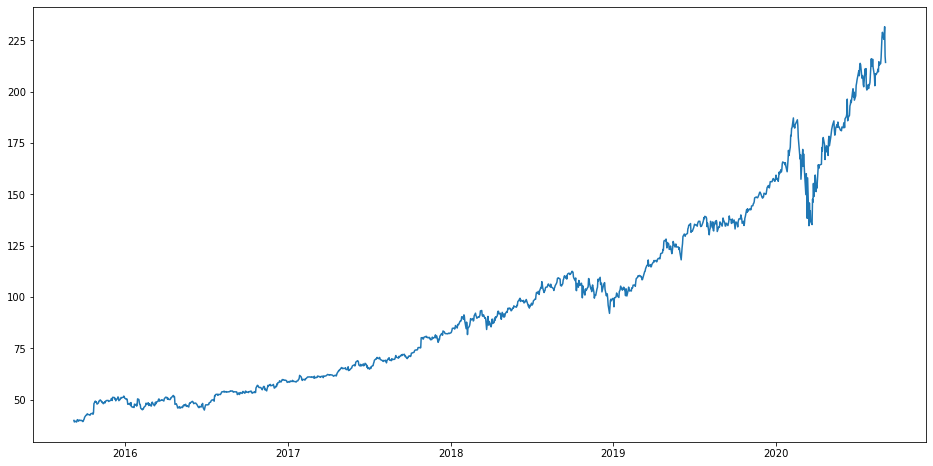

In [142]:
dataset["Date"]=pd.to_datetime(dataset['Date'],format="%Y-%m-%d")
dataset.index=dataset['Date']
plt.figure(figsize=(16,8))
plt.plot(dataset["Close"],label='Close Price history')

In [143]:
training_set = dataset.iloc[:1000,1:2].values
testing_set = dataset.iloc[1000:,1:2].values

In [144]:
from sklearn.preprocessing import MinMaxScaler

In [145]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

# creating data structures with a 60  timestamp to predict one data

In [146]:
X_train = []
y_train = []
for i in range(60,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

In [147]:
X_train,y_train = np.array(X_train),np.array(y_train)

In [148]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [149]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

# Initialising the RNN

In [150]:
regressor  = Sequential()

In [151]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [152]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [153]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [154]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [155]:
regressor.add(Dense(units=1))

In [156]:
regressor.compile(optimizer='adam',loss='mean_squared_error',)

In [157]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Train on 940 samples
Epoch 1/100
940/940 [==============================] - 8s 9ms/sample - loss: 0.0360
Epoch 2/100
940/940 [==============================] - 3s 4ms/sample - loss: 0.0051
Epoch 3/100
940/940 [==============================] - 3s 3ms/sample - loss: 0.0034
Epoch 4/100
940/940 [==============================] - 3s 3ms/sample - loss: 0.0029
Epoch 5/100
940/940 [==============================] - 3s 3ms/sample - loss: 0.0033
Epoch 6/100
940/940 [==============================] - 3s 3ms/sample - loss: 0.0030
Epoch 7/100
940/940 [==============================] - 4s 4ms/sample - loss: 0.0028
Epoch 8/100
940/940 [==============================] - 3s 3ms/sample - loss: 0.0031
Epoch 9/100
940/940 [==============================] - 3s 3ms/sample - loss: 0.0027
Epoch 10/100
940/940 [==============================] - 3s 4ms/sample - loss: 0.0031
Epoch 11/100
940/940 [==============================] - 3s 4ms/sample - loss: 0.0033
Epoch 12/100
940/940 [==============================]

940/940 [==============================] - ETA: 0s - loss: 0.001 - 3s 3ms/sample - loss: 0.0013
Epoch 98/100
940/940 [==============================] - 3s 3ms/sample - loss: 0.0014
Epoch 99/100
940/940 [==============================] - 3s 3ms/sample - loss: 0.0011
Epoch 100/100
940/940 [==============================] - 3s 3ms/sample - loss: 0.0013


In [162]:
total_stock_dataset = dataset['Open']

In [163]:
inputs = total_stock_dataset[len(total_stock_dataset)-len(testing_set)-60:].values

In [166]:
inputs = inputs.reshape(-1,1)

In [168]:
inputs = sc.transform(inputs)

In [173]:
X_test = []
for i in range(60,len(inputs)):
    X_test.append(inputs[i-60:i,0])

In [174]:
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [175]:
predicted_stocks = regressor.predict(X_test)

In [176]:
predicted_stocks = sc.inverse_transform(predicted_stocks)

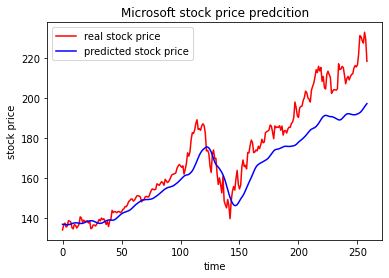

In [186]:
plt.plot(testing_set,color='red',label='real stock price')
plt.plot(predicted_stocks,color='blue',label='predicted stock price')
plt.title('Microsoft stock price predcition')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [185]:
len(testing_set),len(predicted_stocks)

(259, 259)